In [1]:
import pandas as pd

df_train = pd.read_csv('/home/pooja/projectACMS/train_lyrics_1511.csv')
df_test = pd.read_csv('/home/pooja/projectACMS/valid_lyrics_200.csv')

X_train = df_train['lyrics'].values 
y_train = df_train['mood'].values

X_test = df_test['lyrics'].values 
y_test = df_test['mood'].values

df_train.head()

,artist,title,lyrics,mood,year
0,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,sad,1994.0
1,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,happy,1982.0
2,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",sad,2007.0
3,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,happy,1986.0
4,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",sad,1987.0


In [2]:
import pickle
import numpy as np

pickle_in = open('/home/pooja/projectACMS/lyrics_label_encoder_py.pkl', 'rb')
le = pickle.load(pickle_in)
pickle_in.close()

print('before: %s ...' %y_train[:5])

y_train = le.transform(y_train)
y_test = le.transform(y_test)

print('after: %s ...' %y_train[:5])

before: ['sad' 'happy' 'sad' 'happy' 'sad'] ...
after: [1 0 1 0 1] ...


In [4]:
with open('/home/pooja/projectACMS/stopwords_eng.txt') as sw:
    stopwords = sw.read().split()
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

import re

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: text.split(),
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_1 = vec_porter.get_feature_names()
print(vocab_1[-10:])

Vocabular size: 12899 words
['zipper', 'zippin', 'zipping', 'zippo', 'zodiac', 'zoli', 'zombie', 'zone', 'zonin', 'zoo']


In [6]:
# With Porter Stemming

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split()],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_2 = vec_porter.get_feature_names()
print(vocab_2[-10:])

Vocabular size: 9512 words
['ziplock', 'zipper', 'zippin', 'zippo', 'zodiac', 'zoli', 'zombi', 'zone', 'zonin', 'zoo']


In [7]:
with open('/home/pooja/projectACMS/whitelist_dicts/negative-words.txt', 'r') as w:
    negative_words = w.read().split()
print('number of negative words: %s' % len(negative_words))
negative_words[-5:]

number of negative words: 4783


['zaps', 'zealot', 'zealous', 'zealously', 'zombie']

In [8]:
with open('/home/pooja/projectACMS/whitelist_dicts/positive-words.txt', 'r') as w:
    positive_words = w.read().split()
print('number of positive words: %s' % len(positive_words))
positive_words[-5:]

number of positive words: 2006


['youthful', 'zeal', 'zenith', 'zest', 'zippy']

In [9]:
negative_words = set(negative_words)
positive_words = set(positive_words)
semantic_words = negative_words.union(positive_words)

pickle.dump(semantic_words, open('/home/pooja/projectACMS/whitelist_dicts/semantic_words.p', 'wb'))

In [10]:
# With whitelist 

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [word for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_3 = vec_porter.get_feature_names()
print(vocab_3[-10:])


Vocabular size: 1830 words
['wrath', 'wreck', 'wrest', 'wrestle', 'wretched', 'wrong', 'yawn', 'yay', 'zest', 'zombie']


In [11]:
# With whitelist and Porter Stemming

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_4 = vec_porter.get_feature_names()
print(vocab_4[-10:])

Vocabular size: 1453 words
['wrath', 'wreck', 'wrest', 'wrestl', 'wretch', 'wrong', 'yawn', 'yay', 'zest', 'zombi']


In [12]:
print('All words: %s ' % len(vocab_1))
print('Porter: %s ' % len(vocab_2))
print('Whitelist: %s ' % len(vocab_3))
print('Porter + Whitelist: %s ' % len(vocab_4))

All words: 12899 
Porter: 9512 
Whitelist: 1830 
Porter + Whitelist: 1453 


In [13]:
# Requirements

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
from nltk.stem import PorterStemmer
import re
import pickle
from sklearn import metrics

porter = PorterStemmer()

semantic_words = pickle.load(open('/home/pooja/projectACMS/whitelist_dicts/semantic_words.p', 'rb'))

with open('./stopwords_eng.txt') as sw:
    stop_words = sw.read().split()
    
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)

/home/pooja/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/pooja/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

In [15]:
pipeline_1 = Pipeline([
    ('vect', CountVectorizer(binary=False,
                             stop_words=stop_words,
                             ngram_range=(1,1),
                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                             )),
    ('clf', MultinomialNB(fit_prior=False, 
                          alpha=1.0))
])

parameters_1 = dict(
    vect__tokenizer=[tokenizer, tokenizer_porter, tokenizer_whitelist, tokenizer_porter_wl],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


Best score: 0.657
Best parameters set:
	vect__tokenizer: <function <lambda> at 0x7f3bb05d6d90>


In [16]:
pipeline_2 = Pipeline([
    ('vect', TfidfVectorizer(binary=False,
                             stop_words=stop_words,
                             ngram_range=(1,1),
                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                             )),
    ('clf', MultinomialNB(fit_prior=False, 
                          alpha=1.0))
])

parameters_2 = dict(
    vect__tokenizer=[tokenizer, tokenizer_porter, tokenizer_whitelist, tokenizer_porter_wl],
)

grid_search_2 = GridSearchCV(pipeline_2, 
                           parameters_2, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=10
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_2.steps])
grid_search_2.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_2.best_score_)
print("Best parameters set:")
best_parameters_2 = grid_search_2.best_estimator_.get_params()
for param_name in sorted(parameters_2.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


Best score: 0.610
Best parameters set:
	vect__tokenizer: <function <lambda> at 0x7f3bb05d6d90>


In [17]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  

vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  

vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('clf', MultinomialNB(fit_prior=False, alpha=1.0))]))
    
for v in vectorizers[:6]:
    pipelines.append(Pipeline([('vect', v),
                               ('clf', BernoulliNB(fit_prior=False, alpha=1.0))]))

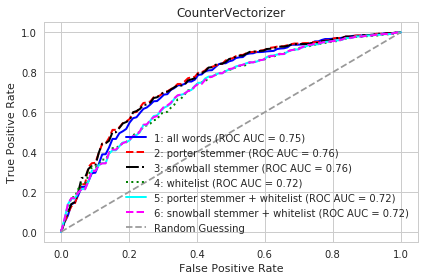

In [18]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[i] for i in range(6)]
labels = ['1: all words', 
          '2: porter stemmer',
          '3: snowball stemmer',
          '4: whitelist',
          '5: porter stemmer + whitelist',
          '6: snowball stemmer + whitelist',
          ]

for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(y_train, n_folds=10, random_state=123)

    for i, (train, test) in enumerate(cv):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('CounterVectorizer')
plt.tight_layout()
plt.savefig('/home/pooja/projectACMS/nb_whitelist_model_images1/roc_gridsearch_1.eps', dpi=300)
plt.show()

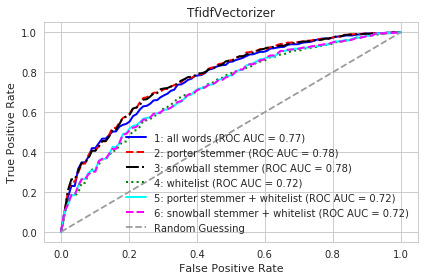

In [19]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[i] for i in range(6,12)]
labels = ['1: all words', 
          '2: porter stemmer',
          '3: snowball stemmer',
          '4: whitelist',
          '5: porter stemmer + whitelist',
          '6: snowball stemmer + whitelist',
          ]

for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(y_train, n_folds=10, random_state=123)

    for i, (train, test) in enumerate(cv):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('TfidfVectorizer')
plt.tight_layout()
plt.savefig('/home/pooja/projectACMS/nb_whitelist_model_images1/roc_gridsearch_2.eps', dpi=300)
plt.show()

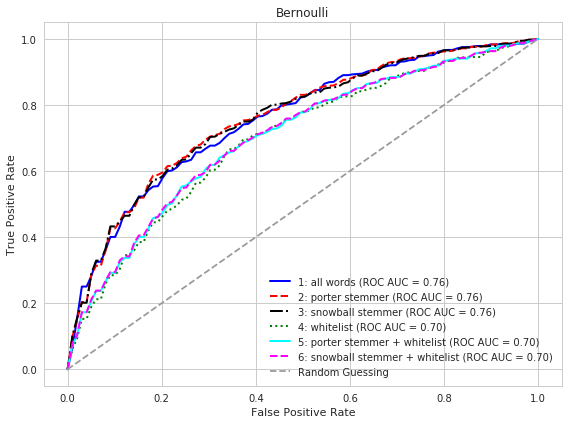

In [20]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[i] for i in range(12,18)]
labels = ['1: all words', 
          '2: porter stemmer',
          '3: snowball stemmer',
          '4: whitelist',
          '5: porter stemmer + whitelist',
          '6: snowball stemmer + whitelist',
          ]

plt.figure(figsize=(8,6))
for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(y_train, n_folds=10, random_state=123)

    for i, (train, test) in enumerate(cv):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Bernoulli')
plt.tight_layout()
plt.savefig('/home/pooja/projectACMS/nb_whitelist_model_images1/roc_gridsearch_3.eps', dpi=300)
plt.show()

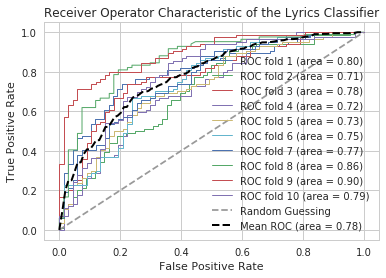

In [21]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

classifier = pipelines[7] # Tfidf + porter


cv = StratifiedKFold(y_train, n_folds=10, random_state=123)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic of the Lyrics Classifier')
plt.legend(loc="lower right")
plt.savefig('/home/pooja/projectACMS/nb_whitelist_model_images1/roc_final.eps', dpi=300)
plt.show()


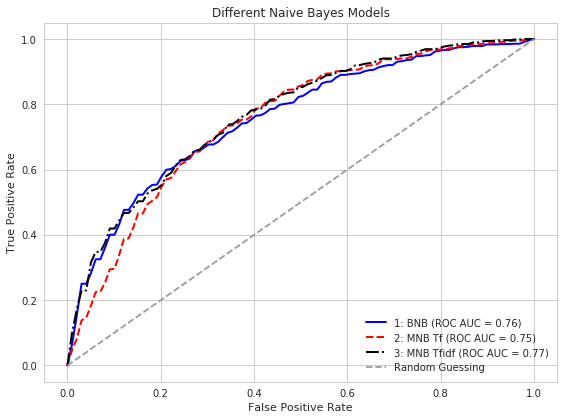

In [22]:
colors = ['blue', 'red', 'black', 'green', 'cyan', 'magenta']
linestyles = ['-', '--', '-.', ':', '-', '--']
classifiers = [pipelines[12], pipelines[0], pipelines[6]]
labels = ['1: BNB', 
          '2: MNB Tf',
          '3: MNB Tfidf',
          ]

plt.figure(figsize=(8,6))

for clf,col,ls,lab in zip(classifiers, colors, linestyles, labels):
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    cv = StratifiedKFold(y_train, n_folds=10, random_state=123)

    for i, (train, test) in enumerate(cv):
        probas_ = clf.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, 
             mean_tpr, 
             color=col, 
             linestyle=ls,
             label='%s (ROC AUC = %0.2f)' % (lab, mean_auc), 
             lw=2
    )

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')    
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Different Naive Bayes Models')
plt.tight_layout()
plt.savefig('/home/pooja/projectACMS/nb_whitelist_model_images1/roc_different_nb.eps', dpi=300)
plt.show()

In [23]:
import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title, dest):

    cm = metrics.confusion_matrix(y, clf.predict(X))

    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(4, 2))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad'],
            xticklabels=['happy','sad'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    plt.savefig(dest, dpi=300)
    plt.show()

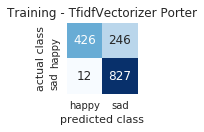

In [24]:
clf = pipelines[7] # Tfidf + porter

clf.fit(X_train, y_train)

plot_cm(X_train, y_train, clf, 'Training - TfidfVectorizer Porter', '/home/pooja/projectACMS/nb_whitelist_model_images1/confmat_tfidf_porter_train.eps')

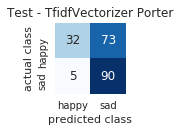

In [25]:
plot_cm(X_test, y_test, clf, 'Test - TfidfVectorizer Porter', '/home/pooja/projectACMS/nb_whitelist_model_images1/confmat_tfidf_porter_test.eps')

In [26]:
from sklearn.naive_bayes import BernoulliNB

In [27]:
from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [28]:
labels = ['BNB Training', 'BNB Training porter', 'BNB Training wl', 'BNB Training porter+wl',
          'MNB Training-CountVec', 'MNB Training-CountVec porter', 'MNB Training-CountVec wl', 'MNB Training-CountVec porter+wl',
          'MNB Training-TfidfVec', 'MNB Training-TfidfVec porter', 'MNB Training-TfidfVec wl', 'MNB Training-TfidfVec porter+wl',
          'BNB Test', 'BNB Test porter', 'BNB Test wl', 'BNB Test porter+wl',
          'MNB Test-CountVec', 'MNB Test-CountVec porter', 'MNB Test-CountVec wl', 'MNB Test-CountVec porter+wl',
          'MNB Test-TfidfVec', 'MNB Test-TfidfVec porter', 'MNB Test-TfidfVec wl', 'MNB Test-TfidfVec porter+wl'
          ]

d = {'Data':labels,
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}


for clf in [pipelines[12], pipelines[13], pipelines[15], pipelines[16], pipelines[0], pipelines[1], pipelines[3], pipelines[4], pipelines[6], pipelines[7], pipelines[9], pipelines[10]]:
    clf.fit(X_train, y_train)

for clf in [pipelines[12], pipelines[13], pipelines[15], pipelines[16], pipelines[0], pipelines[1], pipelines[3], pipelines[4], pipelines[6], pipelines[7], pipelines[9], pipelines[10]]:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_train, y_true=y_train))

for clf in [pipelines[12], pipelines[13], pipelines[15], pipelines[16], pipelines[0], pipelines[1], pipelines[3], pipelines[4], pipelines[6], pipelines[7], pipelines[9], pipelines[10]]:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_test, y_true=y_test))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_test, y_true=y_test))

In [29]:
pd.set_option('precision', 2)

df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(labels)
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
BNB Training,93.32,97.03,87.65,92.10,92.75
BNB Training porter,90.87,94.21,84.67,89.18,90.25
BNB Training wl,81.67,74.78,88.69,81.14,82.37
BNB Training porter+wl,79.09,71.98,86.76,78.68,79.85
MNB Training-CountVec,93.32,93.06,91.82,92.43,93.17
MNB Training-CountVec porter,90.40,90.98,87.05,88.97,90.07
MNB Training-CountVec wl,79.48,75.28,80.21,77.67,79.56
MNB Training-CountVec porter+wl,78.03,74.29,77.38,75.80,77.96
MNB Training-TfidfVec,86.90,97.78,72.17,83.05,85.43
MNB Training-TfidfVec porter,82.93,97.26,63.39,76.76,80.98


In [30]:
df_perform.to_csv('/home/pooja/projectACMS/nb_whitelist_model_data/clf_performance1.csv', index_label=False, float_format='%2.2f')